## 1. Introduction

**1.1 Background**

In the United States, there are around 6 million car accidents every year, on average. In 2019 alone, there were an estimated 38,800 deaths due to car accidents. To put it into perspective, that is a little more than 106 deaths per day. These 6 million accidents result in about 3 million people being injured every year. And out of these 3 million injuries, about 2 million of them are permanent injuries. According to a study conducted by the National Highway Traffic Safety Administration in 2014, the "economic and societal harm from motor vehicle crashes" cost $871 billion in one year. These few statistics show just how big of an issue driver safety is in the United States.

**1.2 Problem**

The intention for this project is to analyze car accident data in Seattle in order to provide accurate predictions on the severity of a car accident, given various factors and conditions.

**1.3 Interest**

First and foremost, drivers would be very interested in accurate predictions of the severity of car accidents. Accurate predictions would allow drivers to be more cognizant of their surroundings in more dangerous areas or even avoid these areas entirely. Secondly, several government entities would be very interested in these findings. Accurate predictions would allow the government to improve conditions by enforcing more safety measures in higher risk areas. Emergency personnel and law enforcement could also be stationed closer to these higher risk areas in order to cut down on response time and potentially be able to save a significant amount of lives every year. Lastly, many different private companies would find this information beneficial. Car insurance companies could leverage this data in order to correctly adjust premiums given the severity of potential accidents. Other companies working on new technology to improve driver safety could also use this data to make key business decisions.

## 2. Data

**2.1 Data Source**

The collisions data used for this project was obtained through the CSV file shared in class. The labeled dataset was recorded by the city of Seattle, Washington from the year 2004 through 2020. The data shows the details of car collisions, including the severity, time, and conditions under which the collision occurred. You can download the CSV file [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv) and the Metadata file [here](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf).

**2.2 Data Acquisition**

Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import random
import json # library to handle JSON files

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt # plotting library
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge geopy --yes #
#from geopy.geocoders import Nominatim # convert an address into latitude and longitude values #

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

#!conda install -c conda-forge folium=0.5.0 --yes #
# import folium # map rendering library #

print('Libraries Imported')

Libraries Imported


Download data

In [2]:
data_link = 'https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv'
df = pd.read_csv(data_link)
df.shape

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(194673, 38)

In [3]:
df.head(5)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


For reference, the location of these collisions can be visualized geographically.

In [4]:
#import folium
#from folium.plugins import MarkerCluster

#map = folium.Map(location = [47.6062, -122.3321], zoom_start = 12)
#markercluster = MarkerCluster().add_to(map)
#locations = df[['Y', 'X']][df['Y'].notna()].head(1000)
#locations_list = locations.values.tolist()
#for point in range(len(locations_list)):
 #   folium.Marker(locations_list[point]).add_to(markercluster)
    
#map 

**2.3 Data Cleaning**

View counts of values in different columns to get a feel for the data.

In [5]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [6]:
df['STATUS'].value_counts().to_frame('Count')

,Count
Matched,189786
Unmatched,4887


In [7]:
df['ADDRTYPE'].value_counts().to_frame('Count')

,Count
Block,126926
Intersection,65070
Alley,751


In [8]:
df['SEVERITYCODE'].value_counts().to_frame('Count')

,Count
1,136485
2,58188


In [9]:
df['COLLISIONTYPE'].value_counts().to_frame('Count')

,Count
Parked Car,47987
Angles,34674
Rear Ended,34090
Other,23703
Sideswipe,18609
Left Turn,13703
Pedestrian,6608
Cycles,5415
Right Turn,2956
Head On,2024


In [10]:
df['PERSONCOUNT'].describe()

count    194673.000000
mean          2.444427
std           1.345929
min           0.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          81.000000
Name: PERSONCOUNT, dtype: float64

In [11]:
df['PEDCOUNT'].describe()

count    194673.000000
mean          0.037139
std           0.198150
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           6.000000
Name: PEDCOUNT, dtype: float64

In [12]:
df['PEDCYLCOUNT'].describe()

count    194673.000000
mean          0.028391
std           0.167413
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.000000
Name: PEDCYLCOUNT, dtype: float64

In [13]:
df['VEHCOUNT'].describe()

count    194673.000000
mean          1.920780
std           0.631047
min           0.000000
25%           2.000000
50%           2.000000
75%           2.000000
max          12.000000
Name: VEHCOUNT, dtype: float64

In [14]:
df['JUNCTIONTYPE'].value_counts().to_frame('Count')

,Count
Mid-Block (not related to intersection),89800
At Intersection (intersection related),62810
Mid-Block (but intersection related),22790
Driveway Junction,10671
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


In [15]:
df['INATTENTIONIND'].value_counts().to_frame('Count')

,Count
Y,29805


In [16]:
df['UNDERINFL'].value_counts().to_frame('Count')

,Count
N,100274
0,80394
Y,5126
1,3995


In [17]:
df['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,111135
Raining,33145
Overcast,27714
Unknown,15091
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [18]:
df['ROADCOND'].value_counts().to_frame('Count')

,Count
Dry,124510
Wet,47474
Unknown,15078
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


In [19]:
df['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,116137
Dark - Street Lights On,48507
Unknown,13473
Dusk,5902
Dawn,2502
Dark - No Street Lights,1537
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [20]:
df['SPEEDING'].value_counts().to_frame('Count')

,Count
Y,9333


In [21]:
df['HITPARKEDCAR'].value_counts().to_frame('Count')

,Count
N,187457
Y,7216


Drop the columns which are irrelevant for this project.

In [22]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [23]:
df_1 = df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 'STATUS', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC', 'PEDROWNOTGRNT', 'SDOTCOLNUM', 'ST_COLCODE', 'ST_COLDESC', 'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'], axis = 1)
df_1.head(10)

,SEVERITYCODE,X,Y,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,-122.323148,47.703140,Intersection,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,-122.347294,47.647172,Block,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,-122.334540,47.607871,Block,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,-122.334803,47.604803,Block,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,-122.306426,47.545739,Intersection,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
5,1,-122.387598,47.690575,Intersection,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
6,1,-122.338485,47.618534,Intersection,2,0,0,2,2008/12/09 00:00:00+00,12/9/2008,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
7,2,-122.320780,47.614076,Intersection,3,0,1,1,2020/04/15 00:00:00+00,4/15/2020 5:47:00 PM,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
8,1,-122.335930,47.611904,Block,2,0,0,2,2006/06/15 00:00:00+00,6/15/2006 1:00:00 PM,Mid-Block (not related to intersection),NaN,0,Clear,Dry,Daylight,NaN
9,2,-122.384700,47.528475,Intersection,2,0,0,2,2006/03/20 00:00:00+00,3/20/2006 3:49:00 PM,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN


Drop location data to work with other features in df_2. Keep location information in df_1 for map visualizations later on.

In [24]:
df_2 = df_1.drop(['X', 'Y', 'INCDATE', 'INCDTTM'], axis = 1)
df_2.head(10)

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
5,1,Intersection,2,0,0,2,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
6,1,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
7,2,Intersection,3,0,1,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
8,1,Block,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Clear,Dry,Daylight,NaN
9,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN


Check for null values in dataframe and deal with them accordingly.

In [25]:
df_2.isnull().sum()

SEVERITYCODE           0
ADDRTYPE            1926
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE        6329
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
SPEEDING          185340
dtype: int64

For these categorical variables, label any missing values with 'Other' or 'Unknown'.

In [26]:
df_2['ADDRTYPE'] = df_2['ADDRTYPE'].fillna('Other')
df_2['JUNCTIONTYPE'] = df_2['JUNCTIONTYPE'].fillna('Other')
df_2['WEATHER'] = df_2['WEATHER'].fillna('Unknown')
df_2['ROADCOND'] = df_2['ROADCOND'].fillna('Unknown')
df_2['LIGHTCOND'] = df_2['LIGHTCOND'].fillna('Unknown')
df_2.head(50)

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,NaN
1,1,Block,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,NaN
2,1,Block,4,0,0,3,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,NaN
3,1,Block,3,0,0,3,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,NaN
4,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
5,1,Intersection,2,0,0,2,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
6,1,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,NaN
7,2,Intersection,3,0,1,1,At Intersection (intersection related),NaN,N,Clear,Dry,Daylight,NaN
8,1,Block,2,0,0,2,Mid-Block (not related to intersection),NaN,0,Clear,Dry,Daylight,NaN
9,2,Intersection,2,0,0,2,At Intersection (intersection related),NaN,0,Clear,Dry,Daylight,NaN


In [27]:
df_2.isnull().sum()

SEVERITYCODE           0
ADDRTYPE               0
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
JUNCTIONTYPE           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER                0
ROADCOND               0
LIGHTCOND              0
SPEEDING          185340
dtype: int64

Replace the missing values in 'INATTENTIONIND' with 0 and change the 'Y' values with 1.

In [28]:
df_2['INATTENTIONIND'].value_counts().to_frame('Count')

,Count
Y,29805


In [29]:
df_2['INATTENTIONIND'] = df_2['INATTENTIONIND'].fillna(0)
df_2['INATTENTIONIND'] = df_2['INATTENTIONIND'].replace('Y', 1)
df_2['INATTENTIONIND'].value_counts().to_frame('Count')

,Count
0,164868
1,29805


Replace the missing values in 'UNDERINFL' with 'UNKNWN', the 0 values with 'N', and the 1 values with 'Y'.

In [30]:
df_2['UNDERINFL'].value_counts().to_frame('Count')

,Count
N,100274
0,80394
Y,5126
1,3995


In [31]:
df_2['UNDERINFL'] = df_2['UNDERINFL'].replace('0', 'N')
df_2['UNDERINFL'] = df_2['UNDERINFL'].replace('1', 'Y')
df_2['UNDERINFL'] = df_2['UNDERINFL'].fillna('UNKNWN')
df_2['UNDERINFL'].value_counts().to_frame('Count')

,Count
N,180668
Y,9121
UNKNWN,4884


Replace the missing values in 'SPEEDING' with 0 and the 'Y' values with 1.

In [32]:
df_2['SPEEDING'].value_counts().to_frame('Count')

,Count
Y,9333


In [33]:
df_2['SPEEDING'] = df_2['SPEEDING'].replace('Y', 1)
df_2['SPEEDING'] = df_2['SPEEDING'].fillna(0)
df_2['SPEEDING'].value_counts().to_frame('Count')

,Count
0.0,185340
1.0,9333


Delete rows where 'WEATHER' variable has too few values to matter.

In [34]:
df_2['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,111135
Raining,33145
Overcast,27714
Unknown,20172
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


In [35]:
df_2.drop(df_2[(df_2['WEATHER'] == 'Partly Cloudy')].index, inplace = True)
df_2['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,111135
Raining,33145
Overcast,27714
Unknown,20172
Snowing,907
Other,832
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


Delete rows where 'LIGHTCOND' variable has too few values to matter.

In [36]:
df_2['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,116135
Dark - Street Lights On,48506
Unknown,18643
Dusk,5902
Dawn,2501
Dark - No Street Lights,1536
Dark - Street Lights Off,1199
Other,235
Dark - Unknown Lighting,11


In [37]:
df_2.drop(df_2[(df_2['LIGHTCOND'] == 'Dark - Unknown Lighting')].index, inplace = True)
df_2['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,116135
Dark - Street Lights On,48506
Unknown,18643
Dusk,5902
Dawn,2501
Dark - No Street Lights,1536
Dark - Street Lights Off,1199
Other,235


Check if any values in 'ROADCOND' are too minimal to matter.

In [38]:
df_2['ROADCOND'].value_counts().to_frame('Count')

,Count
Dry,124502
Wet,47468
Unknown,20088
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


The dataset is now cleaned.

In [39]:
#df_3 is cleaned dataset#
df_3 = df_2
df_3.head(10)

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Overcast,Wet,Daylight,0.0
1,1,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Raining,Wet,Dark - Street Lights On,0.0
2,1,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Overcast,Dry,Daylight,0.0
3,1,Block,3,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0.0
4,2,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Daylight,0.0
5,1,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0.0
6,1,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Daylight,0.0
7,2,Intersection,3,0,1,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0.0
8,1,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0.0
9,2,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0.0


In [40]:
df_3.isnull().sum()

SEVERITYCODE      0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
JUNCTIONTYPE      0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
SPEEDING          0
dtype: int64

Ensuring correct datatypes for each column. During cleaning, the 'SPEEDING' column was changed to float64. For consistency, this column was changed to int64.

In [41]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194657 entries, 0 to 194672
Data columns (total 13 columns):
SEVERITYCODE      194657 non-null int64
ADDRTYPE          194657 non-null object
PERSONCOUNT       194657 non-null int64
PEDCOUNT          194657 non-null int64
PEDCYLCOUNT       194657 non-null int64
VEHCOUNT          194657 non-null int64
JUNCTIONTYPE      194657 non-null object
INATTENTIONIND    194657 non-null int64
UNDERINFL         194657 non-null object
WEATHER           194657 non-null object
ROADCOND          194657 non-null object
LIGHTCOND         194657 non-null object
SPEEDING          194657 non-null float64
dtypes: float64(1), int64(6), object(6)
memory usage: 20.8+ MB


In [42]:
df_3['SPEEDING'] = df_3['SPEEDING'].astype('int64')
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194657 entries, 0 to 194672
Data columns (total 13 columns):
SEVERITYCODE      194657 non-null int64
ADDRTYPE          194657 non-null object
PERSONCOUNT       194657 non-null int64
PEDCOUNT          194657 non-null int64
PEDCYLCOUNT       194657 non-null int64
VEHCOUNT          194657 non-null int64
JUNCTIONTYPE      194657 non-null object
INATTENTIONIND    194657 non-null int64
UNDERINFL         194657 non-null object
WEATHER           194657 non-null object
ROADCOND          194657 non-null object
LIGHTCOND         194657 non-null object
SPEEDING          194657 non-null int64
dtypes: int64(7), object(6)
memory usage: 20.8+ MB


The final cleaned dataset has 194,657 rows.

In [43]:
df_3.shape

(194657, 13)

## 3. Exploratory Data Analysis

Importing necessary libraries.

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Severity')

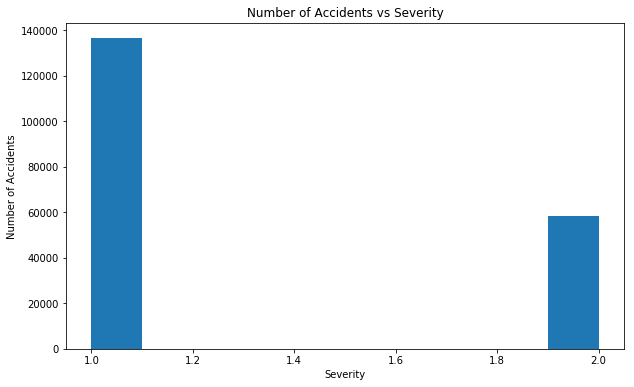

In [45]:
df_3['SEVERITYCODE'].plot(kind = 'hist', figsize=(10,6))
plt.title('Number of Accidents vs Severity')
plt.ylabel('Number of Accidents')
plt.xlabel('Severity')

Exploring the Severity of an Accident vs. Address Type

In [46]:
df_3['ADDRTYPE'].value_counts()

Block           126917
Intersection     65063
Other             1926
Alley              751
Name: ADDRTYPE, dtype: int64

[Text(0, 0.5, 'Alley Count'), Text(0.5, 0, 'Severity Code')]

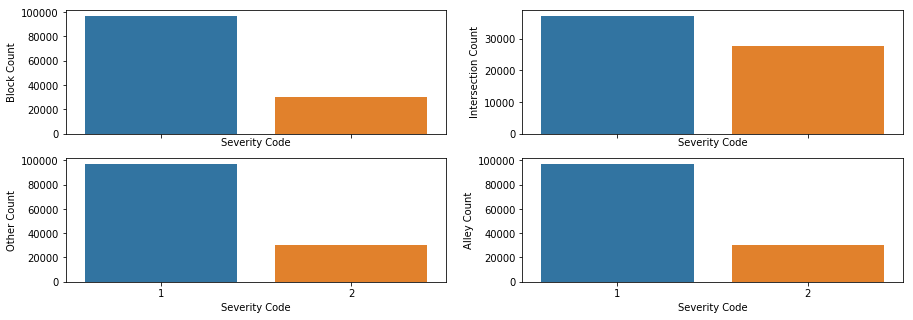

In [47]:
df_block = df_3[df_3['ADDRTYPE'] == 'Block']
df_intersection = df_3[df_3['ADDRTYPE'] == 'Intersection']
df_other = df_3[df_3['ADDRTYPE'] == 'Other']
df_alley = df_3[df_3['ADDRTYPE'] == 'Alley']

fig, axes = plt.subplots(2, 2, sharex = True, figsize = (15,5))

sns.countplot(ax = axes[0,0], x = df_block['SEVERITYCODE'], data = df_block)
axes[0,0].set(xlabel = 'Severity Code', ylabel = 'Block Count')

sns.countplot(ax = axes[0,1], x = df_intersection['SEVERITYCODE'], data = df_intersection)
axes[0,1].set(xlabel = 'Severity Code', ylabel = 'Intersection Count')

sns.countplot(ax = axes[1,0], x = df_block['SEVERITYCODE'], data = df_other)
axes[1,0].set(xlabel = 'Severity Code', ylabel = 'Other Count')

sns.countplot(ax = axes[1,1], x = df_block['SEVERITYCODE'], data = df_alley)
axes[1,1].set(xlabel = 'Severity Code', ylabel = 'Alley Count')

Exploring the Severity of an Accident vs Junction Type

In [48]:
df_3['JUNCTIONTYPE'].value_counts().to_frame('Count')

,Count
Mid-Block (not related to intersection),89793
At Intersection (intersection related),62803
Mid-Block (but intersection related),22788
Driveway Junction,10671
Other,6329
At Intersection (but not related to intersection),2098
Ramp Junction,166
Unknown,9


[Text(0, 0.5, 'Unknown Count'), Text(0.5, 0, 'Severity Code')]

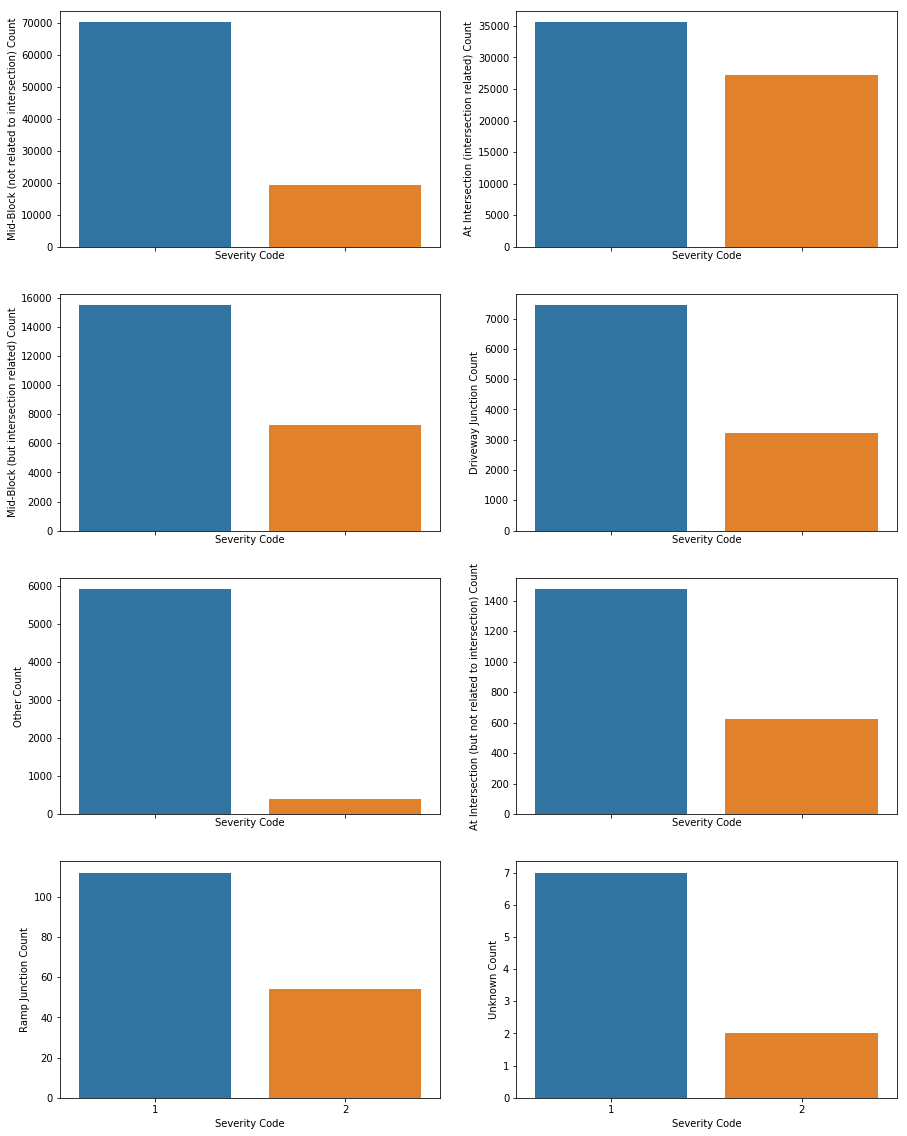

In [49]:
df_junction_1 = df_3[df_3['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)']
df_junction_2 = df_3[df_3['JUNCTIONTYPE'] == 'At Intersection (intersection related)']
df_junction_3 = df_3[df_3['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)']
df_junction_4 = df_3[df_3['JUNCTIONTYPE'] == 'Driveway Junction']
df_junction_5 = df_3[df_3['JUNCTIONTYPE'] == 'Other']
df_junction_6 = df_3[df_3['JUNCTIONTYPE'] == 'At Intersection (but not related to intersection)']
df_junction_7 = df_3[df_3['JUNCTIONTYPE'] == 'Ramp Junction']
df_junction_8 = df_3[df_3['JUNCTIONTYPE'] == 'Unknown']

fig, axes = plt.subplots(4, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0,0], x = df_junction_1['SEVERITYCODE'], data = df_junction_1)
axes[0,0].set(xlabel = 'Severity Code', ylabel = 'Mid-Block (not related to intersection) Count')

sns.countplot(ax = axes[0,1], x = df_junction_2['SEVERITYCODE'], data = df_junction_2)
axes[0,1].set(xlabel = 'Severity Code', ylabel = 'At Intersection (intersection related) Count')

sns.countplot(ax = axes[1,0], x = df_junction_3['SEVERITYCODE'], data = df_junction_3)
axes[1,0].set(xlabel = 'Severity Code', ylabel = 'Mid-Block (but intersection related) Count')

sns.countplot(ax = axes[1,1], x = df_junction_4['SEVERITYCODE'], data = df_junction_4)
axes[1,1].set(xlabel = 'Severity Code', ylabel = 'Driveway Junction Count')

sns.countplot(ax = axes[2,0], x = df_junction_5['SEVERITYCODE'], data = df_junction_5)
axes[2,0].set(xlabel = 'Severity Code', ylabel = 'Other Count')

sns.countplot(ax = axes[2,1], x = df_junction_6['SEVERITYCODE'], data = df_junction_6)
axes[2,1].set(xlabel = 'Severity Code', ylabel = 'At Intersection (but not related to intersection) Count')

sns.countplot(ax = axes[3,0], x = df_junction_7['SEVERITYCODE'], data = df_junction_7)
axes[3,0].set(xlabel = 'Severity Code', ylabel = 'Ramp Junction Count')

sns.countplot(ax = axes[3,1], x = df_junction_8['SEVERITYCODE'], data = df_junction_8)
axes[3,1].set(xlabel = 'Severity Code', ylabel = 'Unknown Count')

Exploring the Severity of an Accident vs Person Count

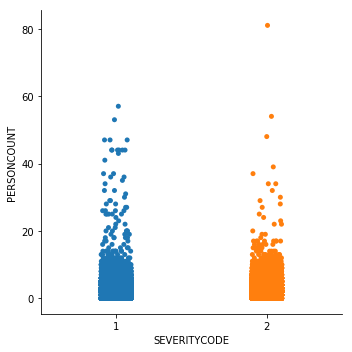

In [50]:
ax3 = sns.catplot(x = 'SEVERITYCODE', y = 'PERSONCOUNT',  data = df_3)

Exploring the Severity of an Accident vs Pedestrian Count

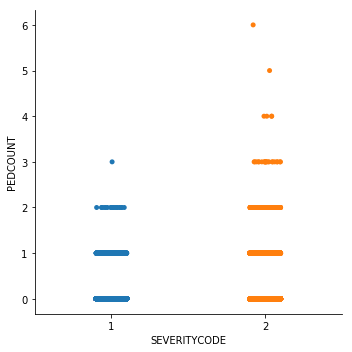

In [51]:
ax3 = sns.catplot( x = 'SEVERITYCODE', y = 'PEDCOUNT', data = df_3)

Exploring the Severity of an Accident vs Cyclist Count

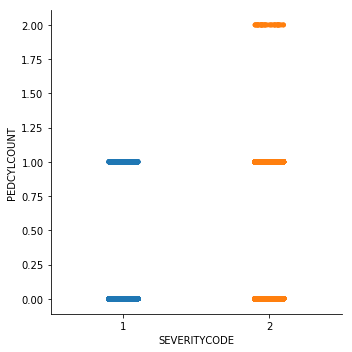

In [52]:
ax3 = sns.catplot( x = 'SEVERITYCODE', y = 'PEDCYLCOUNT', data = df_3)

Exploring the Severity of an Accident vs Vehicle Count

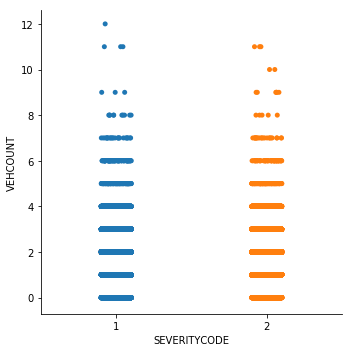

In [53]:
ax3 = sns.catplot( x = 'SEVERITYCODE', y = 'VEHCOUNT', data = df_3)

Exploring the Severity of Accidents where Inattention Occurred

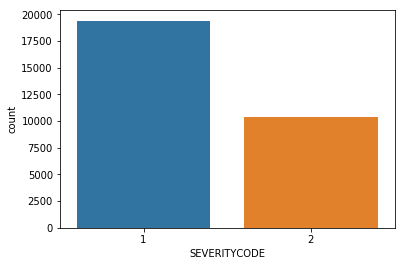

In [54]:
df_inattention = df_3[df_3['INATTENTIONIND'] == 1]

ax5 = sns.countplot( x = df_inattention['SEVERITYCODE'], data = df_inattention)

Exploring the Severity of an Accident where the Driver was Under the Influence of Drugs/Alcohol

In [55]:
df_underinfluence = df_3[df_3['UNDERINFL'] == 'Y']
df_underinfluence['SEVERITYCODE'].value_counts()

1    5559
2    3562
Name: SEVERITYCODE, dtype: int64

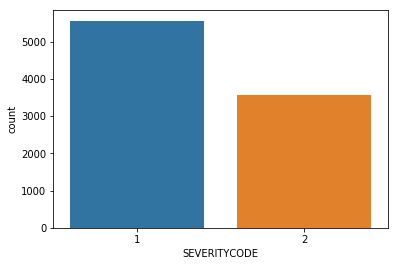

In [56]:
ax6 = sns.countplot( x = df_underinfluence['SEVERITYCODE'], data = df_underinfluence)

Exploring the Severity of an Accident where the Driver was Speeding

In [57]:
df_speeding = df_3[df_3['SPEEDING'] == 1]
df_speeding['SEVERITYCODE'].value_counts()

1    5802
2    3531
Name: SEVERITYCODE, dtype: int64

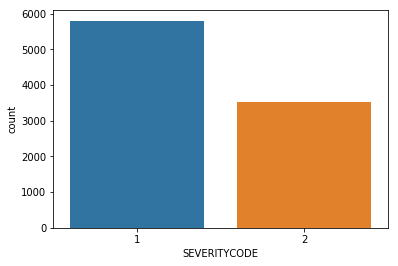

In [58]:
ax7 = sns.countplot( x = df_speeding['SEVERITYCODE'], data = df_speeding)

Exploring the Severity of an Accident vs Weather Conditions

In [59]:
df_3['WEATHER'].value_counts().to_frame('Count')

,Count
Clear,111132
Raining,33140
Overcast,27713
Unknown,20172
Snowing,907
Other,830
Fog/Smog/Smoke,569
Sleet/Hail/Freezing Rain,113
Blowing Sand/Dirt,56
Severe Crosswind,25


[Text(0, 0.5, 'Severe Crosswind Count'), Text(0.5, 0, 'Severity Code')]

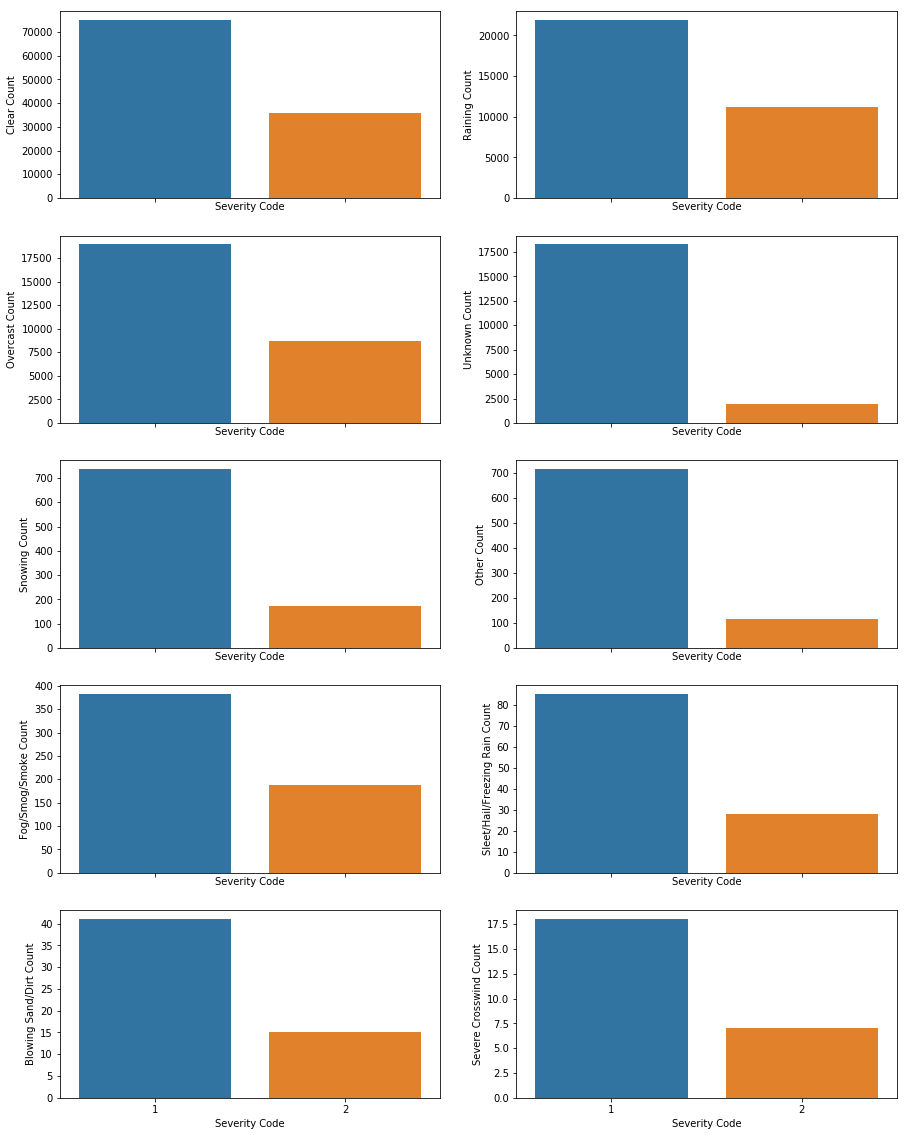

In [60]:
df_weather_1 = df_3[df_3['WEATHER'] == 'Clear']
df_weather_2 = df_3[df_3['WEATHER'] == 'Raining']
df_weather_3 = df_3[df_3['WEATHER'] == 'Overcast']
df_weather_4 = df_3[df_3['WEATHER'] == 'Unknown']
df_weather_5 = df_3[df_3['WEATHER'] == 'Snowing']
df_weather_6 = df_3[df_3['WEATHER'] == 'Other']
df_weather_7 = df_3[df_3['WEATHER'] == 'Fog/Smog/Smoke']
df_weather_8 = df_3[df_3['WEATHER'] == 'Sleet/Hail/Freezing Rain']
df_weather_9 = df_3[df_3['WEATHER'] == 'Blowing Sand/Dirt']
df_weather_10 = df_3[df_3['WEATHER'] == 'Severe Crosswind']

fig, axes = plt.subplots(5, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0,0], x = df_weather_1['SEVERITYCODE'], data = df_weather_1)
axes[0,0].set(xlabel = 'Severity Code', ylabel = 'Clear Count')

sns.countplot(ax = axes[0,1], x = df_weather_2['SEVERITYCODE'], data = df_weather_2)
axes[0,1].set(xlabel = 'Severity Code', ylabel = 'Raining Count')

sns.countplot(ax = axes[1,0], x = df_weather_3['SEVERITYCODE'], data = df_weather_3)
axes[1,0].set(xlabel = 'Severity Code', ylabel = 'Overcast Count')

sns.countplot(ax = axes[1,1], x = df_weather_4['SEVERITYCODE'], data = df_weather_4)
axes[1,1].set(xlabel = 'Severity Code', ylabel = 'Unknown Count')

sns.countplot(ax = axes[2,0], x = df_weather_5['SEVERITYCODE'], data = df_weather_5)
axes[2,0].set(xlabel = 'Severity Code', ylabel = 'Snowing Count')

sns.countplot(ax = axes[2,1], x = df_weather_6['SEVERITYCODE'], data = df_weather_6)
axes[2,1].set(xlabel = 'Severity Code', ylabel = 'Other Count')

sns.countplot(ax = axes[3,0], x = df_weather_7['SEVERITYCODE'], data = df_weather_7)
axes[3,0].set(xlabel = 'Severity Code', ylabel = 'Fog/Smog/Smoke Count')

sns.countplot(ax = axes[3,1], x = df_weather_8['SEVERITYCODE'], data = df_weather_8)
axes[3,1].set(xlabel = 'Severity Code', ylabel = 'Sleet/Hail/Freezing Rain Count')

sns.countplot(ax = axes[4,0], x = df_weather_9['SEVERITYCODE'], data = df_weather_9)
axes[4,0].set(xlabel = 'Severity Code', ylabel = 'Blowing Sand/Dirt Count')

sns.countplot(ax = axes[4,1], x = df_weather_10['SEVERITYCODE'], data = df_weather_10)
axes[4,1].set(xlabel = 'Severity Code', ylabel = 'Severe Crosswind Count')

Exploring the Severity of an Accident vs Road Conditions

In [61]:
df_3['ROADCOND'].value_counts().to_frame('Count')

,Count
Dry,124502
Wet,47468
Unknown,20088
Ice,1209
Snow/Slush,1004
Other,132
Standing Water,115
Sand/Mud/Dirt,75
Oil,64


[Text(0, 0.5, 'Oil Count'), Text(0.5, 0, 'Severity Code')]

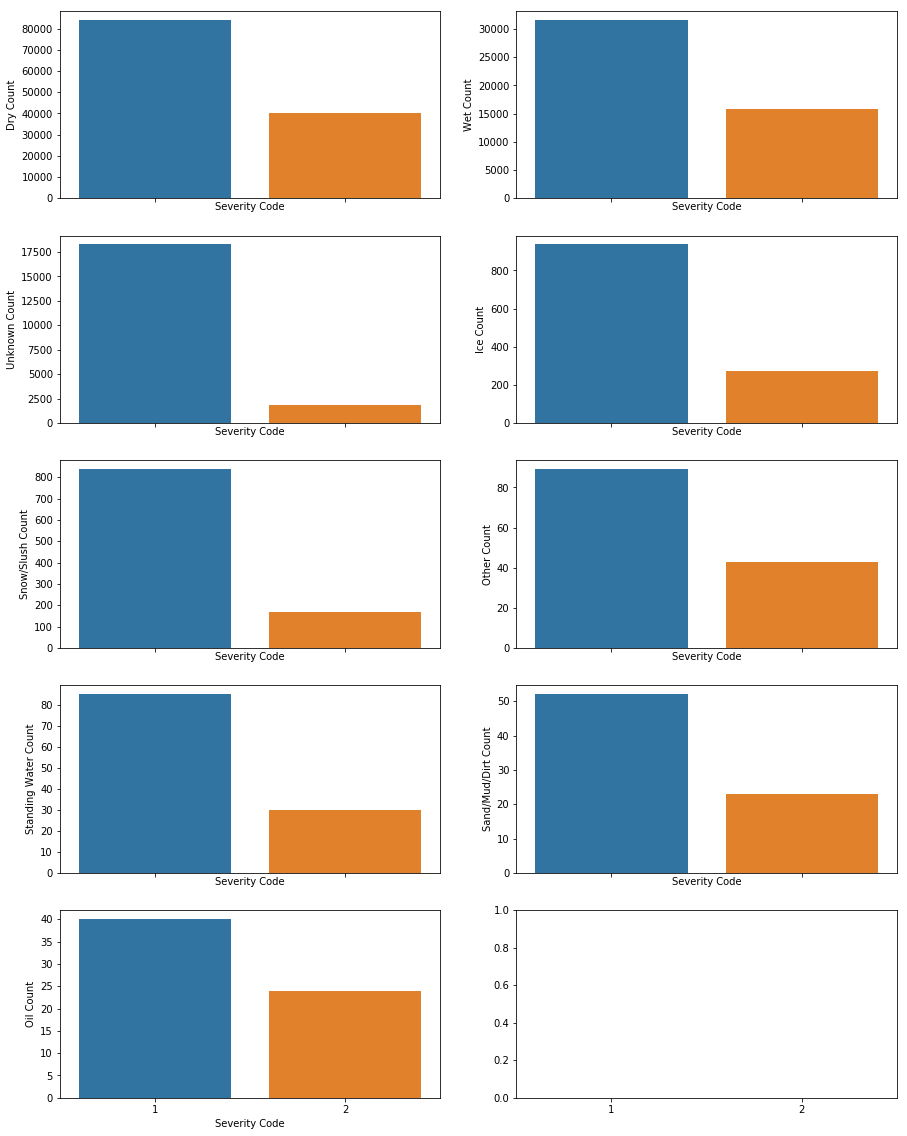

In [62]:
df_roadcond_1 = df_3[df_3['ROADCOND'] == 'Dry']
df_roadcond_2 = df_3[df_3['ROADCOND'] == 'Wet']
df_roadcond_3 = df_3[df_3['ROADCOND'] == 'Unknown']
df_roadcond_4 = df_3[df_3['ROADCOND'] == 'Ice']
df_roadcond_5 = df_3[df_3['ROADCOND'] == 'Snow/Slush']
df_roadcond_6 = df_3[df_3['ROADCOND'] == 'Other']
df_roadcond_7 = df_3[df_3['ROADCOND'] == 'Standing Water']
df_roadcond_8 = df_3[df_3['ROADCOND'] == 'Sand/Mud/Dirt']
df_roadcond_9 = df_3[df_3['ROADCOND'] == 'Oil']

fig, axes = plt.subplots(5, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0,0], x = df_roadcond_1['SEVERITYCODE'], data = df_roadcond_1)
axes[0,0].set(xlabel = 'Severity Code', ylabel = 'Dry Count')

sns.countplot(ax = axes[0,1], x = df_roadcond_2['SEVERITYCODE'], data = df_roadcond_2)
axes[0,1].set(xlabel = 'Severity Code', ylabel = 'Wet Count')

sns.countplot(ax = axes[1,0], x = df_roadcond_3['SEVERITYCODE'], data = df_roadcond_3)
axes[1,0].set(xlabel = 'Severity Code', ylabel = 'Unknown Count')

sns.countplot(ax = axes[1,1], x = df_roadcond_4['SEVERITYCODE'], data = df_roadcond_4)
axes[1,1].set(xlabel = 'Severity Code', ylabel = 'Ice Count')

sns.countplot(ax = axes[2,0], x = df_roadcond_5['SEVERITYCODE'], data = df_roadcond_5)
axes[2,0].set(xlabel = 'Severity Code', ylabel = 'Snow/Slush Count')

sns.countplot(ax = axes[2,1], x = df_roadcond_6['SEVERITYCODE'], data = df_roadcond_6)
axes[2,1].set(xlabel = 'Severity Code', ylabel = 'Other Count')

sns.countplot(ax = axes[3,0], x = df_roadcond_7['SEVERITYCODE'], data = df_roadcond_7)
axes[3,0].set(xlabel = 'Severity Code', ylabel = 'Standing Water Count')

sns.countplot(ax = axes[3,1], x = df_roadcond_8['SEVERITYCODE'], data = df_roadcond_8)
axes[3,1].set(xlabel = 'Severity Code', ylabel = 'Sand/Mud/Dirt Count')

sns.countplot(ax = axes[4,0], x = df_roadcond_9['SEVERITYCODE'], data = df_roadcond_9)
axes[4,0].set(xlabel = 'Severity Code', ylabel = 'Oil Count')

Exploring the Severity of an Accident vs Lighting Conditions

In [63]:
df_3['LIGHTCOND'].value_counts().to_frame('Count')

,Count
Daylight,116135
Dark - Street Lights On,48506
Unknown,18643
Dusk,5902
Dawn,2501
Dark - No Street Lights,1536
Dark - Street Lights Off,1199
Other,235


[Text(0, 0.5, 'Other Count'), Text(0.5, 0, 'Severity Code')]

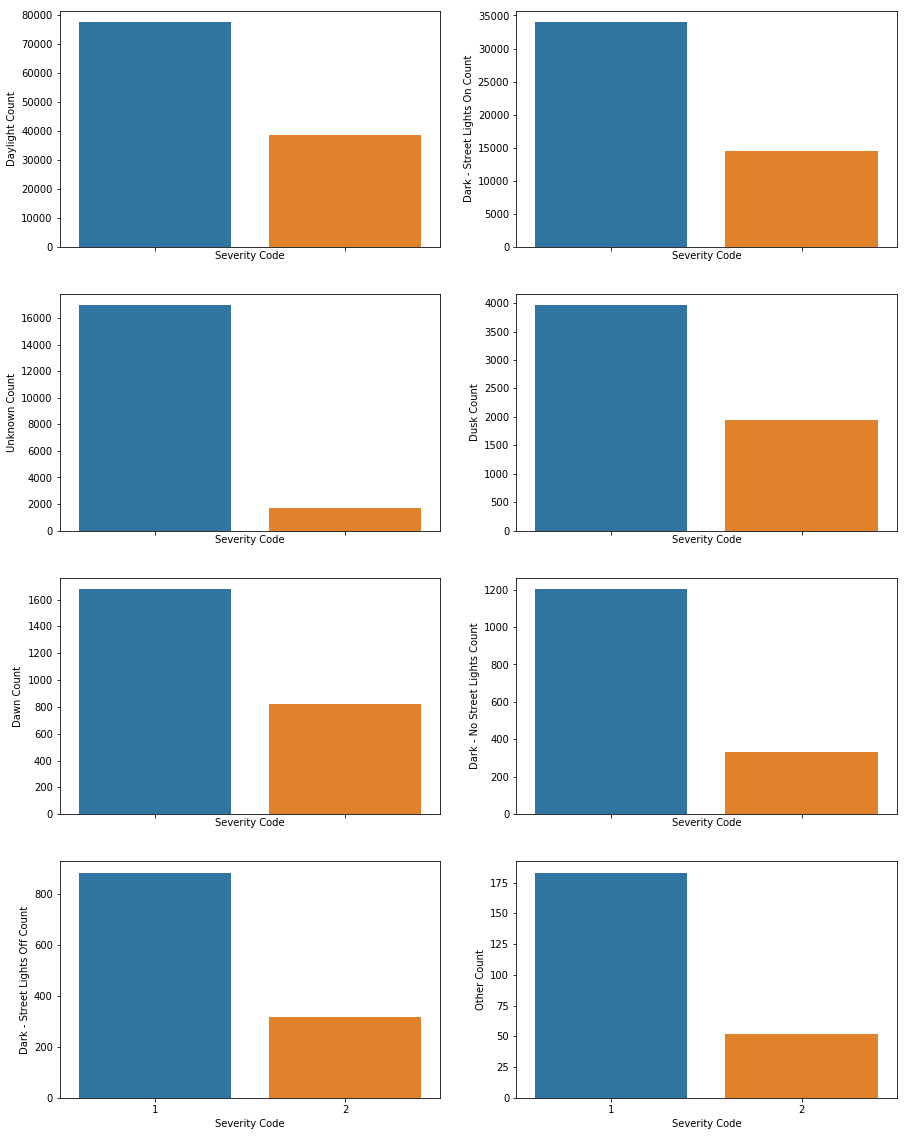

In [64]:
df_lightcond_1 = df_3[df_3['LIGHTCOND'] == 'Daylight']
df_lightcond_2 = df_3[df_3['LIGHTCOND'] == 'Dark - Street Lights On']
df_lightcond_3 = df_3[df_3['LIGHTCOND'] == 'Unknown']
df_lightcond_4 = df_3[df_3['LIGHTCOND'] == 'Dusk']
df_lightcond_5 = df_3[df_3['LIGHTCOND'] == 'Dawn']
df_lightcond_6 = df_3[df_3['LIGHTCOND'] == 'Dark - No Street Lights']
df_lightcond_7 = df_3[df_3['LIGHTCOND'] == 'Dark - Street Lights Off']
df_lightcond_8 = df_3[df_3['LIGHTCOND'] == 'Other']

fig, axes = plt.subplots(4, 2, sharex = True, figsize = (15,20))

sns.countplot(ax = axes[0,0], x = df_lightcond_1['SEVERITYCODE'], data = df_lightcond_1)
axes[0,0].set(xlabel = 'Severity Code', ylabel = 'Daylight Count')

sns.countplot(ax = axes[0,1], x = df_lightcond_2['SEVERITYCODE'], data = df_lightcond_2)
axes[0,1].set(xlabel = 'Severity Code', ylabel = 'Dark - Street Lights On Count')

sns.countplot(ax = axes[1,0], x = df_lightcond_3['SEVERITYCODE'], data = df_lightcond_3)
axes[1,0].set(xlabel = 'Severity Code', ylabel = 'Unknown Count')

sns.countplot(ax = axes[1,1], x = df_lightcond_4['SEVERITYCODE'], data = df_lightcond_4)
axes[1,1].set(xlabel = 'Severity Code', ylabel = 'Dusk Count')

sns.countplot(ax = axes[2,0], x = df_lightcond_5['SEVERITYCODE'], data = df_lightcond_5)
axes[2,0].set(xlabel = 'Severity Code', ylabel = 'Dawn Count')

sns.countplot(ax = axes[2,1], x = df_lightcond_6['SEVERITYCODE'], data = df_lightcond_6)
axes[2,1].set(xlabel = 'Severity Code', ylabel = 'Dark - No Street Lights Count')

sns.countplot(ax = axes[3,0], x = df_lightcond_7['SEVERITYCODE'], data = df_lightcond_7)
axes[3,0].set(xlabel = 'Severity Code', ylabel = 'Dark - Street Lights Off Count')

sns.countplot(ax = axes[3,1], x = df_lightcond_8['SEVERITYCODE'], data = df_lightcond_8)
axes[3,1].set(xlabel = 'Severity Code', ylabel = 'Other Count')

In [65]:
df_3.head(5)

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,2,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Overcast,Wet,Daylight,0
1,1,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Raining,Wet,Dark - Street Lights On,0
2,1,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Overcast,Dry,Daylight,0
3,1,Block,3,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
4,2,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Daylight,0


In [66]:
df_features = df_3[['ADDRTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING']]
print(df_features.shape)
df_features.head(10)

(194657, 12)


,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
0,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Overcast,Wet,Daylight,0
1,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Raining,Wet,Dark - Street Lights On,0
2,Block,4,0,0,3,Mid-Block (not related to intersection),0,N,Overcast,Dry,Daylight,0
3,Block,3,0,0,3,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
4,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Daylight,0
5,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
6,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Raining,Wet,Daylight,0
7,Intersection,3,0,1,1,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0
8,Block,2,0,0,2,Mid-Block (not related to intersection),0,N,Clear,Dry,Daylight,0
9,Intersection,2,0,0,2,At Intersection (intersection related),0,N,Clear,Dry,Daylight,0


## 4. Data Preprocessing

In [67]:
from sklearn import preprocessing

Begin by creating the final features set with all numeric variables.

In [68]:
features_final = df_features[['PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INATTENTIONIND', 'SPEEDING']]
features_final.head()

,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,SPEEDING
0,2,0,0,2,0,0
1,2,0,0,2,0,0
2,4,0,0,3,0,0
3,3,0,0,3,0,0
4,2,0,0,2,0,0


Next, use One Hot Encoding technique to convert all categorical variables to binary variables. Then, append them to the final features set.

In [69]:
features_final = pd.concat([features_final, pd.get_dummies(df_features['ADDRTYPE'])], axis = 1)
features_final = pd.concat([features_final, pd.get_dummies(df_features['JUNCTIONTYPE'])], axis = 1)
features_final = pd.concat([features_final, pd.get_dummies(df_features['UNDERINFL'])], axis = 1)
features_final = pd.concat([features_final, pd.get_dummies(df_features['WEATHER'])], axis = 1)
features_final = pd.concat([features_final, pd.get_dummies(df_features['ROADCOND'])], axis = 1)
features_final = pd.concat([features_final, pd.get_dummies(df_features['LIGHTCOND'])], axis = 1)

print(features_final.shape)
features_final.head()

(194657, 48)


,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,SPEEDING,Alley,Block,Intersection,Other,At Intersection (but not related to intersection),At Intersection (intersection related),Driveway Junction,Mid-Block (but intersection related),Mid-Block (not related to intersection),Other,Ramp Junction,Unknown,N,UNKNWN,Y,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Unknown,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dawn,Daylight,Dusk,Other,Unknown
0,2,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2,0,0,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,4,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,3,0,0,3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,2,0,0,2,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


Now, normalize the data.

In [70]:
features_final = preprocessing.StandardScaler().fit(features_final).transform(features_final)
features_final[0:3]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[-0.33021804, -0.18740911, -0.16957955,  0.12549993, -0.42520411,
        -0.22441134, -0.06223352, -1.36879151,  1.4113197 , -0.09996601,
        -0.10438085,  1.44896021, -0.24082977, -0.36412821, -0.92535426,
        -0.18332011, -0.02921489, -0.0067998 ,  0.27843266, -0.16042447,
        -0.22172116, -0.01696374, -1.15348333, -0.0541448 , -0.06543829,
         2.45439036, -0.45296759, -0.01133347, -0.02410074, -0.06841996,
        -0.34001293, -1.33216755, -0.07905531, -0.01813537, -0.02604949,
        -0.01963267, -0.07200369, -0.02431321, -0.33922261,  1.76091021,
        -0.08918275, -0.07872565, -0.57609862, -0.11408535,  0.82226937,
        -0.17682773, -0.03476652, -0.32545001],
       [-0.33021804, -0.18740911, -0.16957955,  0.12549993, -0.42520411,
        -0.22441134, -0.06223352,  0.73057145, -0.70855668, -0.09996601,
        -0.10438085, -0.69015008, -0.24082977, -0.36412821,  1.0806672 ,
        -0.18332011, -0.02921489, -0.0067998 ,  0.27843266, -0.16042447,
   

Finally, define the target variable, y.

In [71]:
y = df_3['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

## 5. Modeling

The task is to develop a Classification predictive model which will be able to predict the severity of future accidents. Three Multi-Class Classification Models will be developed and their performances will be compared against each other in order to select the best model.

Splitting dataset into training and testing sets.

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, y, test_size = 0.2, random_state = 42)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape)

Train Set:  (155725, 48) (155725,)
Test Set:  (38932, 48) (38932,)


### 5.1 K-Nearest Neighbors

Finding the optimal k-value. The train data is too large to easily find the optimal k-value, so a smaller set of data is taken.

In [73]:
X_train_1 = pd.DataFrame(X_train).sample(n = 10000, random_state = 0)
y_train_1 = pd.DataFrame(y_train).sample(n = 10000, random_state = 0)

X_train_1_train, X_train_1_test, y_train_1_train, y_train_1_test = train_test_split(X_train_1, y_train_1, test_size = 0.2, random_state = 42)
print('Train 1 Set: ', X_train_1_train.shape, y_train_1_train.shape)
print('Test 1 Set: ', X_train_1_test.shape, y_train_1_test.shape)

Train 1 Set:  (8000, 48) (8000, 1)
Test 1 Set:  (2000, 48) (2000, 1)


In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Ks = 26
mean_acc = np.zeros((Ks - 1))

for n in range(1,Ks):
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_1_train, np.ravel(y_train_1_train))
    yhat = neigh.predict(X_train_1_test)
    mean_acc[n-1] = metrics.accuracy_score(y_train_1_test, yhat)
    
print('Mean Accuracy: ', mean_acc)
print('Maximum Mean Accuracy Value: ', mean_acc.max())
k = list(mean_acc).index(mean_acc.max()) + 1
print('Optimal Value for k: ', k)

Mean Accuracy:  [0.6665 0.7045 0.7115 0.7205 0.712  0.7185 0.712  0.7235 0.714  0.719
 0.7135 0.7265 0.723  0.7315 0.726  0.7305 0.7315 0.736  0.7325 0.7365
 0.733  0.732  0.7305 0.732  0.733 ]
Maximum Mean Accuracy Value:  0.7365
Optimal Value for k:  20


Train KNN model with optimal value of k=20

In [75]:
KNN = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='uniform')

### 5.2 Decision Tree

Find the optimal 'max-depth' value by further dividing the training data into training and testing sets.

In [76]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)
print('Train Train Set: ', X_train_train.shape, y_train_train.shape)
print('Train Test Set: ', X_train_test.shape, y_train_test.shape)

Train Train Set:  (124580, 48) (124580,)
Train Test Set:  (31145, 48) (31145,)


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

depth = 20
mean_accuracy = np.zeros((depth - 4))

for n in range(4, depth):
    tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = depth).fit(X_train_train, y_train_train)
    yhat = tree.predict(X_train_test)
    mean_accuracy[n-4] = metrics.accuracy_score(y_train_test, yhat)
    
print('Mean Accuracy Array: ', mean_accuracy)
print('The max mean accuracy is: ', mean_accuracy.max())

max_depth = list(mean_accuracy).index(mean_accuracy.max()) + 4
print('Optimal depth: ', max_depth)

Mean Accuracy Array:  [0.74724675 0.7474394  0.74759994 0.74724675 0.74724675 0.74734307
 0.74737518 0.74724675 0.74695778 0.74724675 0.74740729 0.74727886
 0.7474394  0.7474394  0.7474715  0.74718253]
The max mean accuracy is:  0.747599935784235
Optimal depth:  6


Fit model with optimal max depth.

In [78]:
accident_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth).fit(X_train, y_train)
accident_tree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

### 5.3 Logistic Regression

Find the optimal 'solver' for the model. Due to the large dataset, once again select a small portion of train data to probe for optimal solver.

In [79]:
X_train_2 = pd.DataFrame(X_train).sample(n = 1000, random_state = 0)
y_train_2 = pd.DataFrame(y_train).sample(n = 1000, random_state = 0)

X_train_2_train, X_train_2_test, y_train_2_train, y_train_2_test = train_test_split(X_train_2, y_train_2, test_size = 0.2, random_state = 42)
print('Train 2 Set: ', X_train_1_train.shape, y_train_1_train.shape)
print('Test 2 Set: ', X_train_1_test.shape, y_train_1_test.shape)

Train 2 Set:  (8000, 48) (8000, 1)
Test 2 Set:  (2000, 48) (2000, 1)


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
mean_accuracy_2 = np.zeros((len(solvers)))

for i in range(len(solvers)):
    LR = LogisticRegression(C = 0.01, solver = solvers[i]).fit(X_train_2_train, np.ravel(y_train_2_train))
    yhat = LR.predict(X_train_2_test)
    mean_accuracy_2[i] = metrics.accuracy_score(y_train_2_test, yhat)
    
print('Mean Accuracy Array: ', mean_accuracy_2)
print('The max mean accuracy is: ', mean_accuracy_2.max())

best_solver = solvers[list(mean_accuracy_2).index(mean_accuracy_2.max())]
print('Optimal Solver for model: ', best_solver)

Mean Accuracy Array:  [0.72  0.72  0.715 0.72  0.72 ]
The max mean accuracy is:  0.72
Optimal Solver for model:  newton-cg


The accuracy was equal for 4 of the 5 solvers: newton-cg, lbfgs, sag, and saga. During additional research, it was found that saga is very fast for large datasets. Thus, we will use the solver 'saga' to train the model.

In [95]:
best_solver = 'saga'
LR_final = LogisticRegression(C = 0.01, solver = best_solver).fit(X_train, y_train)
LR_final

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

## 6. Model Evaluation

Importing the necessary libraries.

In [82]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

Create function to plot Confusion Matrices for various models.

In [87]:
def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
        print('Normalized Confusion Matrix')
    else:
        print("Confusion Matrix without Normalization")
    print(cm)
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = 'center', color = 'white' if cm[i, j] > thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

### 6.1 Model Evaluation for K-Nearest Neighbors

In [84]:
yhat_KNN = KNN.predict(X_test)

In [88]:
KNN_jacc = jaccard_similarity_score(y_test, yhat_KNN)
print('KNN Model Jaccard Score: ', KNN_jacc)

KNN_f1 = f1_score(y_test, yhat_KNN)
print('KNN Model f1 Score: ', KNN_f1)

KNN_acc = accuracy_score(y_test, yhat_KNN)
print('KNN Model Subset Accuracy Score: ', KNN_acc)

KNN Model Jaccard Score:  0.7522346655707387
KNN Model f1 Score:  0.8444394271706877
KNN Model Subset Accuracy Score:  0.7522346655707387


Confusion Matrix without Normalization
[[26181  1199]
 [ 8447  3105]]


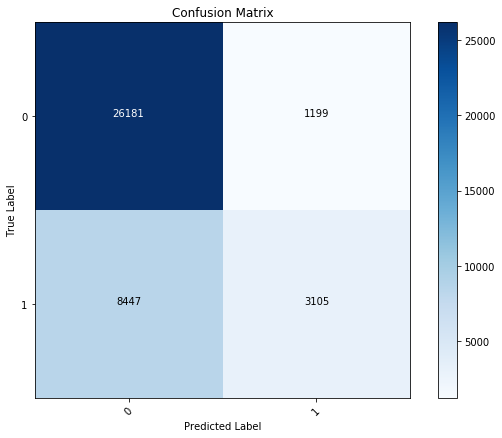

In [90]:
cnf_matrix = confusion_matrix(y_test, yhat_KNN, labels = None)
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix, classes = ['0', '1'], normalize = False, title = 'Confusion Matrix')

### 6.2 Model Evaluation for Decision Tree

In [91]:
yhat_accident_tree = accident_tree.predict(X_test)

In [98]:
DT_jacc = jaccard_similarity_score(y_test, yhat_accident_tree)
print('Decision Tree Model Jaccard Score: ', DT_jacc)

DT_f1 = f1_score(y_test, yhat_accident_tree)
print('Decision Tree Model f1 Score: ', DT_f1)

DT_acc = accuracy_score(y_test, yhat_accident_tree)
print('Decision Tree Model Subset Accuracy Score: ', DT_acc)

Decision Tree Model Jaccard Score:  0.7575259426692695
Decision Tree Model f1 Score:  0.8503345276976251
Decision Tree Model Subset Accuracy Score:  0.7575259426692695


Confusion Matrix without Normalization
[[26817   563]
 [ 8877  2675]]


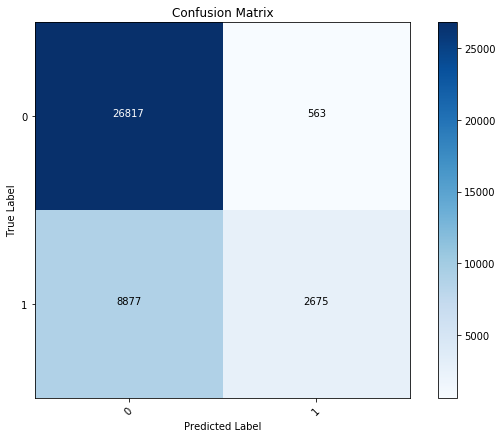

In [93]:
cnf_matrix = confusion_matrix(y_test, yhat_accident_tree, labels = None)
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix, classes = ['0', '1'], normalize = False, title = 'Confusion Matrix')

### 6.3 Model Evaluation for Logistic Regression

In [96]:
yhat_LR_final = LR_final.predict(X_test)

In [97]:
yhat_LR_final_prob = LR_final.predict_proba(X_test)

In [99]:
LR_jacc = jaccard_similarity_score(y_test, yhat_LR_final)
print('Logistic Regression Model Jaccard Score: ', LR_jacc)

LR_f1 = f1_score(y_test, yhat_LR_final)
print('Logistic Regression Model f1 Score: ', LR_f1)

LR_acc = accuracy_score(y_test, yhat_LR_final)
print('Logistic Regression Model Subset Accuracy Score: ', LR_acc)

LR_logloss = log_loss(y_test, yhat_LR_final_prob)
print('Logistic Regression Model Subset Log Loss: ', LR_logloss)

Logistic Regression Model Jaccard Score:  0.7554197061543203
Logistic Regression Model f1 Score:  0.8482114391379201
Logistic Regression Model Subset Accuracy Score:  0.7554197061543203
Logistic Regression Model Subset Log Loss:  0.5149018249372774


Confusion Matrix without Normalization
[[26605   775]
 [ 8747  2805]]


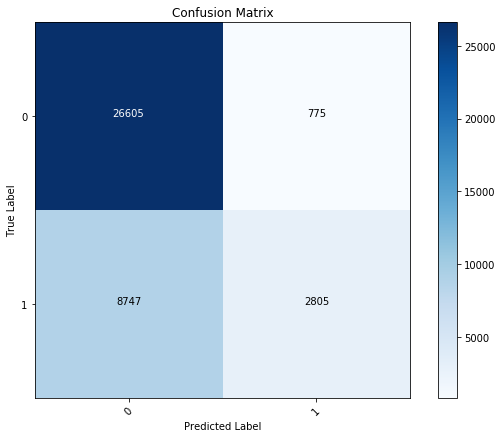

In [100]:
cnf_matrix = confusion_matrix(y_test, yhat_LR_final, labels = None)
plt.figure(figsize = (8,6))
plot_confusion_matrix(cnf_matrix, classes = ['0', '1'], normalize = False, title = 'Confusion Matrix')

## 7. Report

Summarizing the accuracy scores of the 3 models.

In [101]:
scores_dictionary = {'' : ['K-Nearest Neighbors', 'Decision Tree', 'Logistic Regression'], \
                    'Jaccard Score' : [KNN_jacc, DT_jacc, LR_jacc], \
                    'F1 Score' : [KNN_f1, DT_f1, LR_f1], \
                    'Subset Accuracy Score' : [KNN_acc, DT_acc, LR_acc], \
                    'Log Loss' : ['N/A', 'N/A', LR_logloss]}

scores_report = pd.DataFrame.from_dict(scores_dictionary)
scores_report.set_index('', drop = True, inplace = True)
scores_report

,Jaccard Score,F1 Score,Subset Accuracy Score,Log Loss
,,,,
K-Nearest Neighbors,0.752235,0.844439,0.752235,N/A
Decision Tree,0.757526,0.850335,0.757526,N/A
Logistic Regression,0.755420,0.848211,0.755420,0.514902


Based on the accuracy scores of the 3 models, the Decision Tree model should be implemented as it has the highest Jaccard Score, F1 Score, and Subset Accuracy Score.